# Bootstrap and Re-sample Methods

### Data Science 410


## Introduction

Bootstrap and re-sampling methods are widely applicable statistical methods. Unlike the statistical methods we have encountered before, these methods are products of the computer age. By repeatedly re-sampling the data some of the assumptions of classical statistical methods can be relaxed. The trade-off is that re-sampling methods are computationally intensive.    

Re-sampling methods draw heavily on the central limit theorem (CLT). The CLT ensure that re-sampled static estimates converge to the correct value, given the data sample.   

Specifically re-sampling methods:

- Allow computation of statistics from limited data samples of large populations.
- Compute statistics from multiple subsamples of dataset.
- The result is the probability distribution of the statistic being computed.  
- Make minimal distributional assumptions, when compared to classical frequentist statistics.
- Are computationally intensive, but often highly parallelizable.

Commonly used re-sampling methods include:

- Randomization or Permutation methods: e.g. Fisher's exact test.
- Bootstrap: re-sample with equivalent size and replacement.
- Jackknife: leave one out re-sampling.
- Cross validation: re-sample into multiple folds without replacement.


## Pitfalls

Re-sampling methods are general and powerful but, there is no magic involved! When using re-sampling methods always keep in mind these pitfalls:
- If a sample is biased, the re-sampled statistic estimate based on that sample will be biased.
- The sample variance and Cis can be no better than the data sample allows.

![](img/Tobaco.png)

<center>Misuse of inference</center>

## A Brief History of Re-sampling Methods

### Randomization and permutation methods

Randomization and permutation methods were pioneered by Fisher as early as 1911. Fisher fully developed the theory in his 1935 book. Scalability of these permutation methods remain limited, even with modern computers. 

### Cross-validation

Today, cross-validation is widely used in the testing of machine learning models. Cross-validation was originally proposed by Kurtz in 1948. Mosier extended the method to double cross validation in 1951. The modern method of nested or multicross-validation were introduced by Krus and Fuller in 1982. 

### Jack knife methods

Jack knife methods are often effective when there are only limited data samples. Maurice Quenouille originally suggested this method in 1949. The jack knife was fully developed
by John W. Tukey, who gave the method its name, in 1958. Tukey saw that method as a simple tool useful for many purposes like a pocket knife. 


### Bootstrap 

The bootstrap is an extremely general and powerful re-sampling method. In principle, the bootstrap algorithm and can provide estimates of the distributions of most any statistic. The bootstrap method was first suggested by Efron and Hinkley in 1978 and further developed by Efron in 1979. A full treatment was provided in Efron's 1980 book. 

![](img/Efron1980.jpg)

![](img/2014_Efron-outdoors.jpg)

As with other re-sampling methods, the bootstrap algorithm is computationally intensive. However, with increased computing power, use of bootstrap methods continues to expand. Further, the algorithm can be readily parallelized.  

## Point Estimates vs. Distribution Estimates

The goal of **frequentist statistics** is to compute a **point estimate** and **confidence interval** for the point estimate. By a point estimate, we mean a single most likely value for a statistic. The confidence interval is based on the properties of some assumed probability distribution of the statistic. Up to now we have worked with hypothesis tests and summary statistics computed with frequentist methods. For example, with the t-test we found the most likely value of the t-statistic and the confidence interval assuming the difference of means follows a t-distribution.      

Are there alternative to this frequentist approach? Yes, indeed there are. The most widely used alternative are found in **Bayesian statistics**. In this lesson, we will focus on re-sampling methods, particularly **bootstrap** methods. The bootstrap lies somewhere between classical frequentist statistics and Bayesian methods.    

Rather than computing a point estimate directly, bootstrap methods compute a **bootstrap distribution** of the statistic. The bootstrap distribution is comprised of values of the statistic computed from **bootstrap samples** of the original data sample. Based on this distribution a mostly likely point estimate of the statistic, or **bootstrap estimate** (the mean of the distribution) is computed. The **bootstrap confidence interval** is also computed from the bootstrap distribution. This approach is in contrast to the purely frequentist approach of computing point estimates and confidence intervals using the original data sample. 

## Overview of the Bootstrap Algorithm

The bootstrap method follows a simple algorithm. Estimates of the statistic are accumulated by these steps:    

1. Randomly sample (e.g. Bernoulli sample) N data with replacement from an original data sample of N values. That is, the re-sample is the same size as the original data sample.   
2. Re-compute the statistic with the current sample sample. This is a **bootstrap sample** of the statistic.   
3. Repeat steps 1 and 2 to accumulate the required number of bootstrap samples. 
4. Accumulated statistic values form the **bootstrap distribution**. 
5. The mean of the computed statistic values is the **bootstrap point estimate** of the statistic.  

For example, you can compute the bootstrap mean as:

$$Meanboot = \frac{\Sigma_i mean(sample_i)}{nsample}$$
where, for example with 10 data values and example of the ith re-sample might be:
$$sample_i = X_1 + X_2 + X_3 + X_4 + X_5 + X_6 + X_7 + X_8 + X_1 + X_5$$

### Bootstrap example

Let's try a first example. You will bootstrap the mean of the height of different populations from Galton's height data. 

As a first step, the code in the cell imports packages and the second cell loads the data set. Execute this code.

In [18]:
import pandas
import numpy
from matplotlib import pyplot
import seaborn
import statsmodels.api as sm

%matplotlib inline

In [19]:
families = pandas.read_csv('GaltonFamilies.csv', index_col=0)
families.head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
1,1,78.5,67.0,75.43,4,1,male,73.2
2,1,78.5,67.0,75.43,4,2,female,69.2
3,1,78.5,67.0,75.43,4,3,female,69.0
4,1,78.5,67.0,75.43,4,4,female,69.0
5,2,75.5,66.5,73.66,4,1,male,73.5


Now divide the cases by male and female adult children by running the code in the cell below. 

In [20]:
male = families[families.gender == 'male']
female = families[families.gender == 'female']

len(male), len(female)

(481, 453)

The code in the cell below plots the histograms of the two samples along with the means and confidence intervals. Execute this code and examine the results. 

Point estimate of the mean =  69.23
The lower and upper confidence intervals =  64.00  74.00 

Point estimate of the mean =  64.10
The lower and upper confidence intervals =  60.00  69.00 



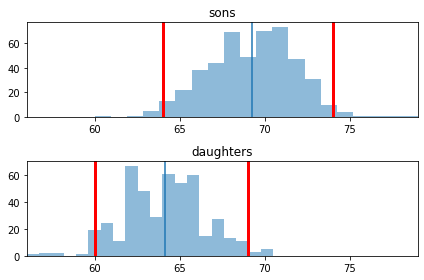

In [33]:
def plot_hist(x, xmin, xmax, p=5, nbins=20):
    # Plot the distribution and mark the mean
    pyplot.hist(x, bins=nbins, alpha=.5)
    x_mean = x.mean() 
    pyplot.axvline(x_mean)
    print('Point estimate of the mean = %6.2f' %x_mean)
    # 95% confidence interval  
    upper_ci = numpy.percentile(x, 100-p/2.)
    lower_ci = numpy.percentile(x, p/2.)
    pyplot.axvline(upper_ci, color='red', linewidth=3)
    pyplot.axvline(lower_ci, color='red', linewidth=3)
    print('The lower and upper confidence intervals = %6.2f %6.2f \n' %(lower_ci,upper_ci))
    pyplot.xlim( xmin, xmax )
    
def plot_dists(a, b, nbins, a_label='pop_A', b_label='pop_B', p=5):
    # Create a single sequence of bins to be shared across both
    # distribution plots for visualization consistency.
    combined = pandas.concat([a, b])
    xmin = combined.min()
    xmax = combined.max()
    breaks = numpy.linspace(
        xmin, xmax, 
        num=nbins+1)

    pyplot.subplot(2, 1, 1)
    plot_hist(a, xmin, xmax)
    pyplot.title(a_label)
    
    pyplot.subplot(2, 1, 2)
    plot_hist(b, xmin = xmin, xmax = xmax)
    pyplot.title(b_label)
    
    pyplot.tight_layout()
    

plot_dists(male.childHeight, female.childHeight, 20, a_label='sons', b_label='daughters')

The means of these distributions are clearly different. It also appears that the means are beyond the confidence intervals of the sample distributions. But, are these means significantly different?     

### Bootstrap difference in means

In the previous example you computed the means and confidence intervals of the sample distributions of the male and female adult child height data. Now you will bootstrap the difference in means to determine if it is significant. 

The code in the cell below generates bootstrap samples from the full male and female data sub-sets and then computes the difference in the means. The result is the bootstrap distribution of the difference of means. The point estimate of the difference in means is then the mean of this distribution. And, the confidence intervals for this point estimate are also computed from this distribution. 

Run the code and examine the plotted results.

Point estimate of the mean =   5.13
The lower and upper confidence intervals =   4.80     5.45 



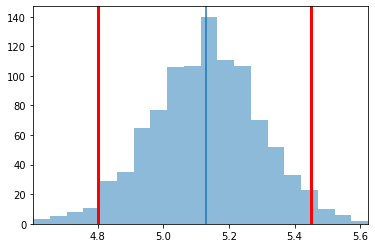

In [22]:
diffs = []
n_replicas=1000
for i in range(n_replicas):
    sample = families.sample(frac=1.0, replace=True)
    male_sample_mean = sample[sample.gender == 'male'].childHeight.mean()
    female_sample_mean = sample[sample.gender == 'female'].childHeight.mean()
    diffs.append(male_sample_mean - female_sample_mean)
diffs = pandas.Series(diffs)

plot_hist(diffs, diffs.min(), diffs.max())

The values of the distribution of the difference in means is far from zero. We can infer that the means of the two populations are significantly different. 

But, is the distribution of the difference in means Normal as implied by the CLT. Run the code in the cell below to create a Q-Q Normal plot of the bootstrap distribution of the difference in means and examine the results. 

Text(0.5, 1.0, 'Quantiles of standard Normal vs. bookstrapped mean')

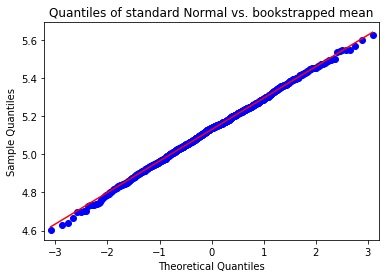

In [23]:
## Is the bootstrapped distribution Normal?
fig = sm.qqplot(diffs, line='s')
pyplot.title('Quantiles of standard Normal vs. bookstrapped mean')

The points on the Q-Q Normal plot are nearly on a strait line. Apparently, the bootstrap distribution of the difference in means does conform to the CLT.

**Your Turn:** In the cell below, create and run the code to compare the difference in means of adult sons to their fathers. Is the difference significant? Also, check if the distribution in the difference in means is approximately Normal. 

Point estimate of the mean =   0.09
The lower and upper confidence intervals =  -0.15     0.35 



Text(0.5, 1.0, 'Quantiles of standard Normal vs. bootstrapped mean')

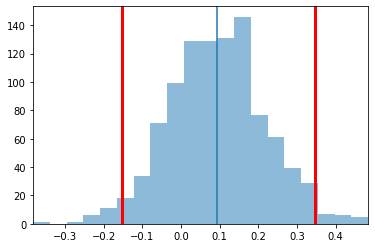

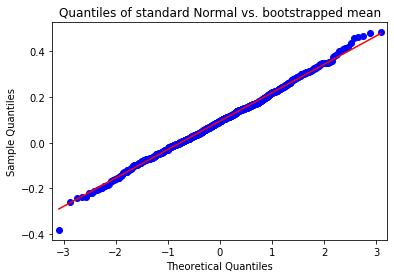

In [24]:
diffs = []
for i in range(n_replicas):
    sample = families.sample(frac=1.0, replace=True)
    male_sample_mean = sample[sample.gender == 'male'].childHeight.mean()
    father_sample_mean = sample[sample.gender == 'male'].father.mean()
    diffs.append(male_sample_mean - father_sample_mean)
diffs = pandas.Series(diffs)

plot_hist(diffs, diffs.min(), diffs.max())

fig = sm.qqplot(diffs, line='s')
pyplot.title('Quantiles of standard Normal vs. bootstrapped mean')

## Bootstrapping other statistics

The bootstrap method can be applied to most any statistic. The code in the cell below computes the difference in medians of the sons and the fathers. The median is an order statistic, and the values of a median are discretized by the quanta of the samples. Run this code and examine the results.

Point estimate of the mean =   0.28
The lower and upper confidence intervals =  -0.10     1.00 



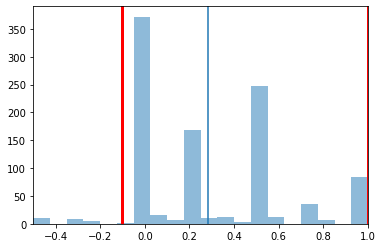

In [25]:
median_diffs = []
for i in range(n_replicas):
    sample = families.sample(frac=1.0, replace=True)
    male_sample_median = sample[sample.gender == 'male'].childHeight.median()
    father_sample_median = sample[sample.gender == 'male'].father.median()
    median_diffs.append(male_sample_median - father_sample_median)
median_diffs = pandas.Series(median_diffs)

plot_hist(median_diffs, median_diffs.min(), median_diffs.max())

The chart shows that the bootstrap distribution of the difference in medians. The confidence interval overlaps zero, so we must accept the null hypothesis that the difference in medians is zero.

You can also plot the Q-Q Normal plot of the bootstrap distribution of the difference in medians. Run the code in the cell below and examine the result.

Text(0.5, 1.0, 'Quantiles of standard Normal vs. bootstrapped median')

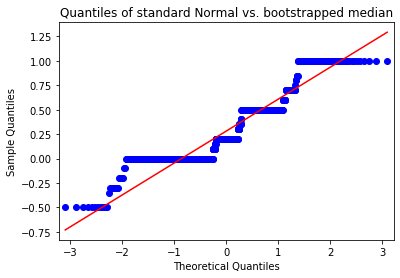

In [26]:
## Is the bootstrapped distribution Normal?
fig = sm.qqplot(median_diffs, line='s')
pyplot.title('Quantiles of standard Normal vs. bootstrapped median')

Keep in mind that strictly the CLT only applies to sample means, not medians or any other statistic. None the less, you can see that the Q-Q Normal plot of the bootstrap distribution of the difference in medians tends down the center diagonal of the plot. The zig-zag behavior arises from the quantization inherent in the median.

## The Jack Knife

The jack knife is another re-sampling method. The jack knife is related to the bootstrap, but is a bit more restrictive in its application. Specifically, the jack knife:

1. Generate a **jack knife leave one out sample** of size N-1 is computed.
2. A **jack knife estimate** of the statistic is computed from the sample.
3. Steps 1 and 2 are repeated N times. There are the same number of jack knife samples as there are data values in the original sample. The accumulated knife estimates form the **jack knife distribution**.
4. The mean of the jack knife distribution is the jack knife point estimate of the statistic. 
5. The jack knife confidence intervals are computed from the jack knife distribution. 

> **Note:** The jack knife method only works for statistics with continuous derivatives.

For example, you can compute the jack knife mean as:

$$MeanJK = \frac{\Sigma_i mean(sample_i)}{nsample}$$
where, for example, with 10 data samples, the ith jack knife sample is:
$$sample_i = X_1 + X_2 + X_3 + X_4 + X_5 + X_6 + X_8 + X_9 + X_{10}$$

A simple example of using a jack knife estimation of a mean is shown in the cells below. First run the code to find the length of the two samples. This length is equal to the number of jack knife samples. 

In [27]:
print("We have %d male rows and %d female rows" % (len(male), len(female)))

We have 481 male rows and 453 female rows


We'll use the index of each row within a set (either male or female) to leave each of the observations (rows) out, one at a time. Execute the code in the cell below to reset the index.

In [28]:
# Re-number the rows in each set starting from zero or else the row indices
# would still match the original `families` dataframe we started with.
male = male.reset_index(drop=True)
female = female.reset_index(drop=True)

Now we can drop any particular row(s) we like and compute our jack knife sample mean on the remaining rows. A trick is to selecting all rows except for a given row index is the following, where we drop the row at index==3 (note the left-most column values skip 3). Execute the code in the cell below and note the result.

In [29]:
male.drop(male.iloc[[3]].index).head()

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,2,75.5,66.5,73.66,4,1,male,73.5
2,2,75.5,66.5,73.66,4,2,male,72.5
4,4,75.0,64.0,72.06,5,1,male,70.5
5,4,75.0,64.0,72.06,5,2,male,68.5


We can then compute a summary statistic of our choice on the rows that were not dropped like so:

In [30]:
male.drop(male.iloc[[3]].index).childHeight.mean()

69.23041666666673

Let's now use this strategy to leave each of the rows out, one at a time, and collect the summary statistics (child height mean) for each.

Point estimate of the mean =  69.23
The lower and upper confidence intervals =  69.22  69.25 

Point estimate of the mean =  64.10
The lower and upper confidence intervals =  64.09  64.11 



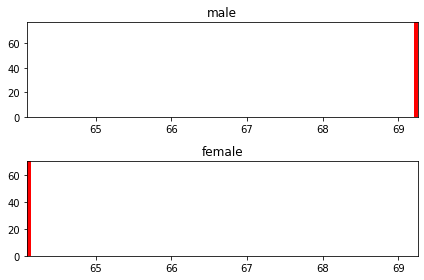

In [37]:
male_jk_means = pandas.Series([
        male.drop(male.iloc[[i]].index).childHeight.mean()
        for i in range(len(male))])

female_jk_means = pandas.Series([
        female.drop(female.iloc[[i]].index).childHeight.mean()
        for i in range(len(female))])

plot_dists(male_jk_means,female_jk_means, nbins=20, a_label='male', b_label='female', p=5)

## Cross Validation

**Cross validation** is a **leave many out** re-sampling technique. Cross validation uses multiple non-overlapping subsamples, known as **folds**, to train and test a data set. THe basic cross validation algorithm uses the following steps:

1. Divide dataset into N randomly selected non-overlapping folds. 
2. Use N – 1 Folds train a machine learning model. 
3. Use the remaining fold to evaluate model performance.
4. Repeat steps 2 and 3, holding out a different fold each time. 
5. Compute the mean and standard deviation of the performance metrics using the M results. 

The basic concept of cross validation is illustrated below. 

![](img/CrossValidation.jpg)
    
Model performance is evaluated using at aggregated summary statistics across the the trained models. Test data from each re-sample is used for the evaluation. The re-sampling reduces bias in the model performance statistics. Most importantly, cross validation reduces unpleasant surprises when a model is placed in production. 

The jack knife is an extreme end member of the family of cross validation methods. With the jack knife, the number of folds equals the number of data points. 

There are several variations on cross validation. The most commonly used is **nested cross validation**. In nested cross validation, cross validation is performed for multiple models to compare performance. In this context, a model of the same class with different hyperparameters is a different model. 



#### Copyright 2017, 2018, 2020, Stephen F Elston. All rights reserved. 